In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=218993fcd5bfed9267582aec0558c6b9


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kaitangata
Processing Record 2 of Set 1 | bundaberg
Processing Record 3 of Set 1 | thompson
Processing Record 4 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 5 of Set 1 | boca do acre
Processing Record 6 of Set 1 | najran
Processing Record 7 of Set 1 | turukhansk
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | hervey bay
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | palasa
Processing Record 13 of Set 1 | santa maria
Processing Record 14 of Set 1 | port alfred
Processing Record 15 of Set 1 | tiksi
Processing Record 16 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | atuona
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | barentsburg
City not found. Skippin

Processing Record 36 of Set 4 | quatre cocos
Processing Record 37 of Set 4 | salaga
Processing Record 38 of Set 4 | klaksvik
Processing Record 39 of Set 4 | soe
Processing Record 40 of Set 4 | dunedin
Processing Record 41 of Set 4 | matelandia
Processing Record 42 of Set 4 | bandundu
Processing Record 43 of Set 4 | oeiras do para
Processing Record 44 of Set 4 | noyabrsk
Processing Record 45 of Set 4 | smithers
Processing Record 46 of Set 4 | mentok
City not found. Skipping...
Processing Record 47 of Set 4 | los llanos de aridane
Processing Record 48 of Set 4 | kieta
Processing Record 49 of Set 4 | north bend
Processing Record 50 of Set 4 | rio grande
Processing Record 1 of Set 5 | oriximina
Processing Record 2 of Set 5 | meiktila
Processing Record 3 of Set 5 | sataua
City not found. Skipping...
Processing Record 4 of Set 5 | coahuayana
Processing Record 5 of Set 5 | abu zabad
Processing Record 6 of Set 5 | chaves
Processing Record 7 of Set 5 | princeville
Processing Record 8 of Set 5 |

City not found. Skipping...
Processing Record 23 of Set 8 | tabas
Processing Record 24 of Set 8 | hualmay
Processing Record 25 of Set 8 | luderitz
Processing Record 26 of Set 8 | cabedelo
Processing Record 27 of Set 8 | innellan
Processing Record 28 of Set 8 | lagoa
Processing Record 29 of Set 8 | cockburn town
Processing Record 30 of Set 8 | vredendal
Processing Record 31 of Set 8 | lavrentiya
Processing Record 32 of Set 8 | khasan
Processing Record 33 of Set 8 | pangnirtung
Processing Record 34 of Set 8 | general roca
Processing Record 35 of Set 8 | ramhormoz
Processing Record 36 of Set 8 | college
Processing Record 37 of Set 8 | juanjui
Processing Record 38 of Set 8 | berlevag
Processing Record 39 of Set 8 | eskisehir
Processing Record 40 of Set 8 | penticton
Processing Record 41 of Set 8 | cazones
Processing Record 42 of Set 8 | santo angelo
Processing Record 43 of Set 8 | ambah
Processing Record 44 of Set 8 | manggar
Processing Record 45 of Set 8 | ozinki
Processing Record 46 of S

Processing Record 9 of Set 12 | kilindoni
Processing Record 10 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 11 of Set 12 | tiarei
Processing Record 12 of Set 12 | aiken
Processing Record 13 of Set 12 | machico
Processing Record 14 of Set 12 | homer
Processing Record 15 of Set 12 | kahului
Processing Record 16 of Set 12 | feijo
Processing Record 17 of Set 12 | sur
Processing Record 18 of Set 12 | saint-augustin
Processing Record 19 of Set 12 | burica
City not found. Skipping...
Processing Record 20 of Set 12 | gilgil
City not found. Skipping...
Processing Record 21 of Set 12 | kaihua
Processing Record 22 of Set 12 | kabalo
Processing Record 23 of Set 12 | falealupo
City not found. Skipping...
Processing Record 24 of Set 12 | mao
Processing Record 25 of Set 12 | shenyang
Processing Record 26 of Set 12 | ouallam
Processing Record 27 of Set 12 | torres
Processing Record 28 of Set 12 | rota
Processing Record 29 of Set 12 | tautira
Processing Record 30 of Set 12 | o

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kaitangata,-46.2817,169.8464,46.99,80,5,4.00,NZ,2021-04-05 17:51:41
1,Bundaberg,-24.8500,152.3500,71.60,100,90,8.05,AU,2021-04-05 17:51:41
2,Thompson,55.7435,-97.8558,35.60,93,90,4.61,CA,2021-04-05 17:51:42
3,Boca Do Acre,-8.7522,-67.3978,84.85,69,98,1.81,BR,2021-04-05 17:51:42
4,Najran,17.4924,44.1277,77.00,22,11,13.80,SA,2021-04-05 17:49:22
5,Turukhansk,65.8167,87.9833,30.43,90,97,13.00,RU,2021-04-05 17:51:43
6,Kapaa,22.0752,-159.3190,73.40,73,40,20.71,US,2021-04-05 17:51:43
7,Hervey Bay,-25.2986,152.8535,72.00,97,100,1.01,AU,2021-04-05 17:51:44
8,Severo-Kurilsk,50.6789,156.1250,27.50,87,91,14.65,RU,2021-04-05 17:51:44
9,Palasa,18.7667,84.4167,77.16,89,0,6.40,IN,2021-04-05 17:51:44


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df[new_column_order]


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kaitangata,NZ,2021-04-05 17:51:41,-46.2817,169.8464,46.99,80,5,4.00
1,Bundaberg,AU,2021-04-05 17:51:41,-24.8500,152.3500,71.60,100,90,8.05
2,Thompson,CA,2021-04-05 17:51:42,55.7435,-97.8558,35.60,93,90,4.61
3,Boca Do Acre,BR,2021-04-05 17:51:42,-8.7522,-67.3978,84.85,69,98,1.81
4,Najran,SA,2021-04-05 17:49:22,17.4924,44.1277,77.00,22,11,13.80
...,...,...,...,...,...,...,...,...,...
552,Rojhan,PK,2021-04-05 17:54:58,28.6868,69.9534,82.74,23,99,17.09
553,Maridi,SS,2021-04-05 17:54:58,4.9158,29.4742,77.50,52,34,3.42
554,Woodland,US,2021-04-05 17:54:59,38.6785,-121.7733,57.99,67,1,4.61
555,Khatanga,RU,2021-04-05 17:54:59,71.9667,102.5000,3.92,87,82,8.72


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

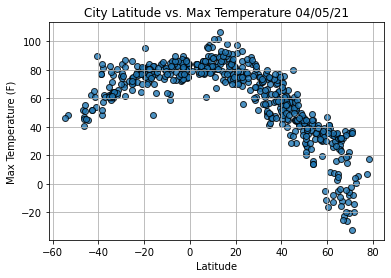

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

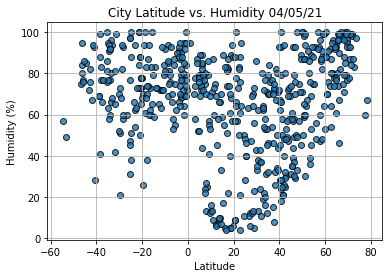

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

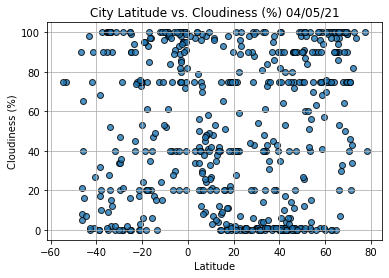

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

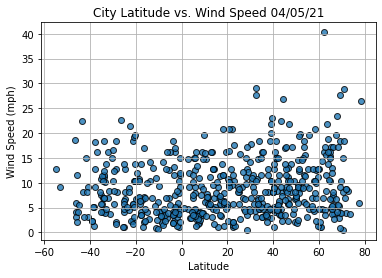

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                     Cidreira
Lat                      -30.1811
Lng                      -50.2056
Max Temp                    75.42
Humidity                       70
Cloudiness                     34
Wind Speed                  15.05
Country                        BR
Date          2021-04-05 17:51:46
Name: 13, dtype: object

In [20]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4       True
       ...  
552     True
553     True
554     True
555     True
556     True
Name: Lat, Length: 557, dtype: bool

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Thompson,55.7435,-97.8558,35.60,93,90,4.61,CA,2021-04-05 17:51:42
4,Najran,17.4924,44.1277,77.00,22,11,13.80,SA,2021-04-05 17:49:22
5,Turukhansk,65.8167,87.9833,30.43,90,97,13.00,RU,2021-04-05 17:51:43
6,Kapaa,22.0752,-159.3190,73.40,73,40,20.71,US,2021-04-05 17:51:43
8,Severo-Kurilsk,50.6789,156.1250,27.50,87,91,14.65,RU,2021-04-05 17:51:44
...,...,...,...,...,...,...,...,...,...
552,Rojhan,28.6868,69.9534,82.74,23,99,17.09,PK,2021-04-05 17:54:58
553,Maridi,4.9158,29.4742,77.50,52,34,3.42,SS,2021-04-05 17:54:58
554,Woodland,38.6785,-121.7733,57.99,67,1,4.61,US,2021-04-05 17:54:59
555,Khatanga,71.9667,102.5000,3.92,87,82,8.72,RU,2021-04-05 17:54:59


In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Thompson,55.7435,-97.8558,35.60,93,90,4.61,CA,2021-04-05 17:51:42
4,Najran,17.4924,44.1277,77.00,22,11,13.80,SA,2021-04-05 17:49:22
5,Turukhansk,65.8167,87.9833,30.43,90,97,13.00,RU,2021-04-05 17:51:43
6,Kapaa,22.0752,-159.3190,73.40,73,40,20.71,US,2021-04-05 17:51:43
8,Severo-Kurilsk,50.6789,156.1250,27.50,87,91,14.65,RU,2021-04-05 17:51:44


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

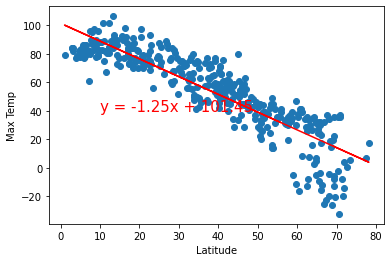

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

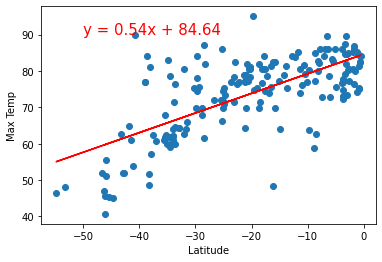

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

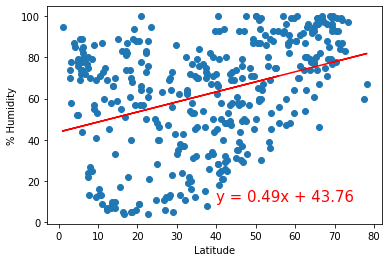

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

SyntaxError: EOL while scanning string literal (<ipython-input-31-9c3e8b244753>, line 6)

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                    for % Cloudiness', '% Cloudiness',(10,55))

SyntaxError: EOL while scanning string literal (<ipython-input-33-b816cc100669>, line 6)

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Cloudiness', '% Cloudiness',(-50,60))

SyntaxError: EOL while scanning string literal (<ipython-input-34-3dc99b339452>, line 6)

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(40,35))

SyntaxError: EOL while scanning string literal (<ipython-input-35-7024af74f12d>, line 6)

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Wind Speed', 'Wind Speed',(-50,35))

SyntaxError: EOL while scanning string literal (<ipython-input-36-8c4f0e57bb27>, line 6)